# Numerical Recipes Workshop 2

For the week of 4 October to 8 October, 2021

**Please submit your notebook via Noteable by Friday, 8 October by 6:00pm BST. Don't forget to clear the output first.**

### Learning Objectives
- Working with complex numbers
- Matrix operations
- Matrix solving
- Computing eigenvalues and eigenvectors
- Discretizing differential equations

**Note, wherever you see `raise NotImplementedError()`, you should delete that line and put your code there.**

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import time

In [2]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 14

## Complex Numbers

Complex numbers of the form $a + bi$ (where $i = \sqrt{-1}$) are natively supported by the `complex` type in Python. Complex numbers can be expressed just as above, only with the letter $j$ substituted for $i$. Try the following below:

```
x = 5 + 4j
print (x)
print (type(x))
```

In [3]:
# YOUR CODE HERE
x = 5 + 4j
print (x)
print (type(x))

(5+4j)
<class 'complex'>


The `complex` type has attributes, `real` and `imag`, to access the real and imaginary components. It also has a `conjugate` class method to compute the complex conjugate. Below, print out the real and imaginary components of `x` and its complex conjugate.

Hint, for an object `x`, an attribute `y` is accessed as `x.y` and a method `z` is access (or called, to be exact) as `x.z()`.

In [4]:
# YOUR CODE HERE
print(x.real)
print(x.imag)
print(x.conjugate())

5.0
4.0
(5-4j)


### Complex Arrays

NumPy also has support for arrays of complex numbers. A complex array can be created in a very similar way. Try the following below. Note that it is not enough to say `j*np.array(...)`. One must use `1j`.

```
x = np.arange(10) + 1j*np.arange(10)
```

The `conj` class method can be used to compute the complex conjugate of the array. The array also has `real` and `imag` attributes. Arithmetic operations on complex arrays work the same as normal numeric arrays. Now you know!

In [5]:
# YOUR CODE HERE
x = np.arange(10) + 1j*np.arange(10)
print(x)
print(x.conjugate())

[0.+0.j 1.+1.j 2.+2.j 3.+3.j 4.+4.j 5.+5.j 6.+6.j 7.+7.j 8.+8.j 9.+9.j]
[0.-0.j 1.-1.j 2.-2.j 3.-3.j 4.-4.j 5.-5.j 6.-6.j 7.-7.j 8.-8.j 9.-9.j]


Remember in math class (Americans just call it "math", not "maths") when they told you that $e^{i \omega t} = \cos{\omega t} + i \sin{\omega t}$ and you were like, "Come on, no way!" Well, now's your chance to prove it to yourself (or prove those math teachers wrong once and for all).

In the cell below, make a plot of the real and imaginary components of $f(t) = e^{i \omega t}$, where $\omega = 1$, over the range $t = 0$ to $4\pi$. Add axes labels and a legend.

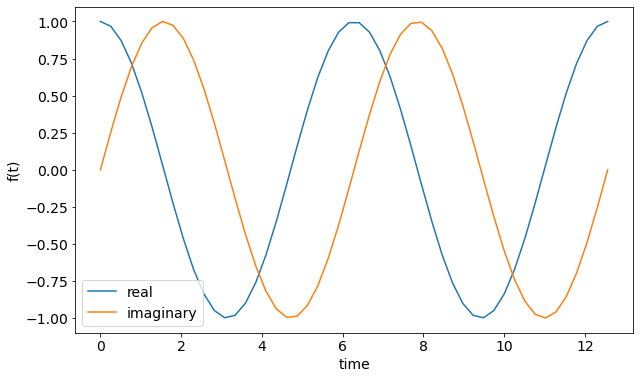

In [6]:
# YOUR CODE HERE
omega = 1
t = np.linspace(0,(4*np.pi))
f = np.exp(1j*omega*t)
plt.plot(t,f.real,label='real')
plt.plot(t,f.imag,label='imaginary')
plt.legend()
plt.xlabel('time');
plt.ylabel('f(t)');

##  Working with Matrices

The recommended way to work with matrices is to define them as regular NumPy arrays. Multidimensional arrays come with built-in functions for doing things like transposes, matrix multiplication, and getting values along the diagonal.

In the cell, we make two 5x5 arrays, a and b, filled with random values. Use them to try out the following operations:
- get the transpose of an array by accessing its `T` attribute (e.g., `a.T` for matrix a).
- print the values along the diagonal using the `diagonal` class method (e.g., `a.diagonal()` for matrix a).
- perform the matrix multiplication of $a \times b$ using the `@` operator (i.e., `a @ b`). Alternatively, one can do `np.dot(a, b)`. Compare this to what you get when you simply do `a * b`.

**Note, your random values will be different from those of your neighbors.**

In [7]:
N = 5
a = np.random.random((N, N))
b = np.random.random((N, N))
# YOUR CODE HERE

#print(a.T);
#print(a.diagonal())
#print(a@b)
#print(np.dot(a,b))
print(a*b) #multiplies them piecewise

[[2.11158334e-01 7.76089437e-01 5.44944522e-02 2.11945727e-03
  1.68958424e-01]
 [4.34126702e-02 3.46931209e-01 3.80606412e-01 3.34626654e-01
  2.48112656e-01]
 [7.46105961e-01 5.46151334e-02 6.62732809e-01 5.21109170e-01
  1.58133627e-02]
 [4.27877673e-01 5.97725456e-02 1.14298702e-01 4.38089274e-02
  1.99463706e-02]
 [2.98263425e-01 1.20476952e-03 2.74076564e-02 3.99092194e-04
  1.23194122e-02]]


## Matrix Solving

The [scipy.linalg](https://docs.scipy.org/doc/scipy/reference/linalg.html) module has functionality for solving matrix equations of the form

$
\Large
\begin{align}
\mathbf{A} x = \mathbf{b}
\end{align}
$

Below, we set matrices, $\mathbf{A}$ and $\mathbf{b}$. Use [solve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve.html#scipy.linalg.solve) to compute $x$ and confirm that it is a correct solution to the equation.

We'll use the `time.time` function to time how long it takes.

In [3]:
from scipy import linalg

In [9]:
N = 5
a = np.random.random((N, N))
b = np.random.random((N, 1))
t1 = time.time()
# YOUR CODE HERE
x = linalg.solve(a,b)
t2 = time.time()
print (f"That took {t2-t1} seconds.")

That took 0.0006415843963623047 seconds.


### How well does it scale?

In the cell below, repeat the steps above for matrices of increasing size to estimate how well the `solve` function scales for dense matrices. Start at N = 100 and increase up to ~10000 or so by doubling N each time. Compute the time taken to call `solve`. Store values in a list and make a plot of N vs. t. Can you estimate the scaling by eye from the plot?

In [10]:
# YOUR CODE HERE
N = 100
size = []
timediff = []
while N < 6000:
    size.append(N)
    a = np.random.random((N, N))
    b = np.random.random((N, 1))
    t1 = time.time()
    linalg.solve(a,b)
    t2 = time.time()
    td = t2-t1
    timediff.append(td)
    N = N + N

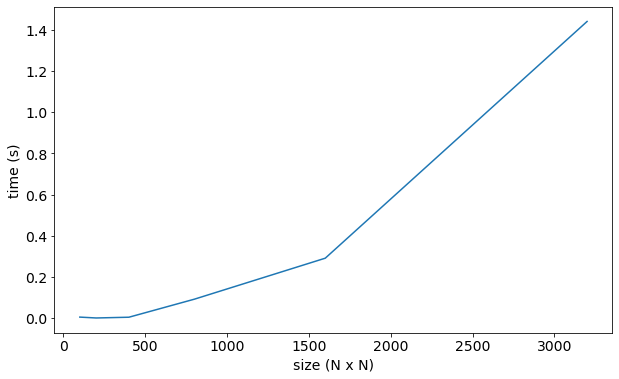

In [11]:
plt.plot(size,timediff)
plt.xlabel('size (N x N)');
plt.ylabel('time (s)');

## Computing Eigenvalues

The [scipy.linalg](https://docs.scipy.org/doc/scipy/reference/linalg.html) library also contains a number of useful  functions for calculating eigenvalue and eigenvectors. Most relevantly, the [scipy.linalg.eig](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eig.html#scipy.linalg.eig) function can be used for computing the eigenvalues and eigenvectors of a general, square matrix.

As a reminder, the eigen-equation is

$
\large
\begin{align}
A \mathbf{X} = \lambda \mathbf{X}
\end{align}
$

where $\lambda$ are the eigenvalues and  $\mathbf{X}$ are the eigenvectors.

In the cell below, compute the eigenvalues and eigenvectors for a 5x5 matrix of random values. Then, confirm that these eigenvectors and eigenvalues satisfy the eigen-equation.

Specifically, check that the following has been satisfied:

$
\large
\begin{align}
A \mathbf{X} - \lambda \mathbf{X} = 0
\end{align}
$

Note, the values should be close, but not exactly zero.

In [12]:
N = 5
a = np.random.random((N, N))
# YOUR CODE HERE
eigval, eigvec = linalg.eig(a)
a@eigvec - eigval*eigvec

array([[ 1.33226763e-15+0.00000000e+00j,  1.80411242e-16+1.38777878e-17j,
         1.80411242e-16-1.38777878e-17j, -5.55111512e-17+1.11022302e-16j,
        -5.55111512e-17-1.11022302e-16j],
       [-1.33226763e-15+0.00000000e+00j, -2.77555756e-17+2.22044605e-16j,
        -2.77555756e-17-2.22044605e-16j,  2.01227923e-16+2.01227923e-16j,
         2.01227923e-16-2.01227923e-16j],
       [ 6.66133815e-16+0.00000000e+00j,  4.09394740e-16+3.81639165e-17j,
         4.09394740e-16-3.81639165e-17j,  0.00000000e+00+2.22044605e-16j,
         0.00000000e+00-2.22044605e-16j],
       [ 2.22044605e-16+0.00000000e+00j,  9.54097912e-17-1.80411242e-16j,
         9.54097912e-17+1.80411242e-16j, -3.67761377e-16-5.55111512e-17j,
        -3.67761377e-16+5.55111512e-17j],
       [-6.66133815e-16+0.00000000e+00j,  1.44957830e-16-8.32667268e-17j,
         1.44957830e-16+8.32667268e-17j, -4.99600361e-16+1.66533454e-16j,
        -4.99600361e-16-1.66533454e-16j]])

### Fun with symmetric matrices

Symmetric matrices (where `x[i,j] == x[j,i]`) have an interesting property where a histogram of all eigenvalues looks like a semi-circle. Let's demonstrate this.

#### Creating a symmetric matrix

A symmetric matrix of random values can be created in the following way:
1. Create a random NxN array of random values as we have done previously.
2. Add to that matrix its tranpose. Verify the symmetry of the matrix by checking `(x == x.T).all()`.

Next, do some additional normalization to limit the range of the eigenvalues.

```
x -= x.mean()
x /= np.sqrt(N)
```

Below, create the symmetric matrix and calculate its eigenvalues. Use the code below to plot a histogram of the eigenvalues.
```
hist, bins = np.histogram(evals.real, bins=50, density=True)

plt.bar(bins[:-1], hist, width=(bins[1]-bins[0]))
plt.show()
```

Start with a value of N~100 and increase until you get a nice circular shape. Break this activity up into multiple cells to make it easier to follow.

In [13]:
# Create matrix
N = 5000
a = np.random.random((N, N))
a = a + a.T

In [14]:
#check symmetry
print((a == a.T).all())

True


In [15]:
#normalisation
a -= a.mean()
a /= np.sqrt(N)

In [ ]:
eigval, eigvec = linalg.eig(a)

In [ ]:
hist, bins = np.histogram(eigval.real, bins=50, density=True)

plt.bar(bins[:-1], hist, width=(bins[1]-bins[0]))
plt.show()

## Sparse Matrices

Notice how the computation time increases when calculating eigenvalues for larger matrices. The memory usage is also rising. However, sparse matrices are mostly filled with zeros. Hence, they can be stored in various compressed formats to decrease the amount of memory and computation required. The [scipy.sparse](https://docs.scipy.org/doc/scipy/reference/sparse.html) module provides functionality for creating and operating on sparse matrices. In particular, the [scipy.sparse.linalg](https://docs.scipy.org/doc/scipy/reference/sparse.linalg.html#module-scipy.sparse.linalg) module provides optimized routines for computations with sparse matrices.

### The Laplace Operator

The continuous Laplace operator, $\mathop{}\!\mathbin\bigtriangleup$, is defined as

$
\Large
\begin{align}
\mathop{}\!\mathbin\bigtriangleup f(x) = \nabla^2 f(x) = \nabla \cdot \nabla f = \frac{\partial^2 f}{\partial x^2}
\end{align}
$

For a set of discreet points, $x$, with separation, $h$, (i.e., x$_n = n h$), the above equation can be discretized as

$
\Large
\begin{align}
\mathop{}\!\mathbin\bigtriangleup f(x) = \frac{f(x+h) - 2 f(x) + f(x-h)}{h^2}
\end{align}
$

In matrix form, $\mathop{}\!\mathbin\bigtriangleup$ becomes

$
\Large
\begin{align}
\mathop{}\!\mathbin\bigtriangleup = \frac{1}{h^2}
\begin{pmatrix}
-2     &      1 &  0     & \cdots & \cdots & \cdots \\
1      &     -2 &      1 &      0 & \cdots & \cdots \\
0      &      1 &     -2 &      1 &      0 & \cdots \\
\vdots & \ddots & \ddots & \ddots & \ddots & \ddots \\
\vdots & \vdots & 0      &      1 &     -2 &      1 \\
\vdots & \vdots & \vdots &      0 &      1 &     -2 \\
\end{pmatrix}
\end{align}
$

In the cell below, use the [diags](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.diags.html) function from the SciPy sparse module to create a 5x5 version of the Laplace operator.

In [4]:
from scipy import sparse
from scipy.sparse import linalg as splinalg

In [5]:
N = 5
x = np.ones(N-1)
y = -2*np.ones(N)
diagonals = [x, y, x]

In [6]:
L = sparse.diags(diagonals, [-1, 0, 1], shape=(N,N)).toarray()

The matrix you create will have a `toarray` function associated with it (i.e., `x.toarray()` for a matrix `x`). Use this to verify that your matrix has been created properly.

In [7]:
# YOUR CODE HERE
print(L)

[[-2.  1.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.]
 [ 0.  1. -2.  1.  0.]
 [ 0.  0.  1. -2.  1.]
 [ 0.  0.  0.  1. -2.]]


Now, create the same matrix for N = 1000 (i.e., 1000x1000). Use the [eigsh](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.eigsh.html) function to compute the 10 "largest magnitude" eigenvalues. Compare the lowest of these to the theoretical value of $2 (cos(\frac{\pi N}{N+1}) - 1)$.

In [8]:
# YOUR CODE HERE
N = 1000
x = np.ones(N-1)
y = -2*np.ones(N)
diagonals = [x, y, x]
L = sparse.diags(diagonals, [-1, 0, 1], shape=(N,N)).toarray()

In [9]:
w,v = splinalg.eigsh(L,k=10)

In [10]:
w_theory = 2*(np.cos(np.pi*N/(N+1))-1)

In [11]:
w, w_theory

(array([-3.99999015, -3.9999606 , -3.99991135, -3.9998424 , -3.99975376,
        -3.99964541, -3.99951737, -3.99936964, -3.99920221, -3.99901509]),
 -3.999990150113323)

## Springs and springs and springs...

Imagine a system of masses connected by springs. If we take $m$ to be the individual masses and $k$ to be the spring coefficient for the connecting springs, then the equation of motion for the masses in the middle looks like:

$
\Large
\begin{align}
m \frac{d^2 \xi_i}{dt^2} = k (\xi_{i+1} - \xi_i) + k (\xi_{i-1} - \xi_i)
\end{align}
$

$\xi_{i}$ represents the distance of mass $i$ from its position of rest. The first and last masses are described by:

$
\Large
\begin{align}
m \frac{d^2 \xi_0}{dt^2} = k (\xi_1 - \xi_0) + F_0
\end{align}
$

$
\Large
\begin{align}
m \frac{d^2 \xi_{N-1}}{dt^2} = k (\xi_{N-2} - \xi_{N-1}) + F_{N-1}
\end{align}
$

Here, $F_0$ and $F_{N-1}$ are external forces applied to the left and right masses.

Suppose we set the force on the right side to 0 and apply a sinusoidal force on the left mass that can be described by the real component of:

$
\Large
\begin{align}
F_0 = C e^{i \omega t}
\end{align}
$

The result is that all masses will oscillate with a constant frequency, $\omega$, but with an amplitude, $x_i$, that will vary for each mass such that the solution is:

$
\Large
\begin{align}
\xi_i(t) = x_i(t) e^{i \omega t}
\end{align}
$

This yields the following system of equations.

$
\Large
\begin{align}
-m \omega^2 x_0 = k (x_1 - x_0) + C
\end{align}
$

$
\Large
\begin{align}
-m \omega^2 x_i = k (x_{i-1} - x_{i}) + k (x_{i-1} - x_i)
\end{align}
$

$
\Large
\begin{align}
-m \omega^2 x_{N-1} = k (x_{N-2} - x_{N-1})
\end{align}
$

If we then make the following substitution, $\alpha = 2k - m \omega^2$, the system of equations reduces to:

$
\Large
\begin{align}
(\alpha - k) x_0 - k x_1 = C
\end{align}
$

$
\Large
\begin{align}
\alpha x_i - k x_{i-1} - k x_{i+1} = 0
\end{align}
$

$
\Large
\begin{align}
(\alpha - k) x_{N-1} - k x_{N-2} = 0
\end{align}
$

Using the values defined below for the constants, express the above system of equations in matrix form. Then, solve the system for $x$ and make a plot $x$ vs. $i$.

Bonus challenge: increase N to something much larger and try solving for $x$ with a more efficient method (maybe something from the sparse module or another specialized solver function). Can you find a method that scales better than a conventional solve?

In [12]:
m = 1 # mass
k = 6 # spring constant
w = 2 # oscillator frequency
a = 2*k - m*w**2
C = 1 # forcing amplitude

N = 100

In [13]:
x = -k*np.ones(N-1)
y = a*np.ones(N)
diagonals = [x, y, x]
A = sparse.diags(diagonals, [-1, 0, 1], shape=(N,N)).toarray()
A[0,0] = a-k
A[N-1,N-1] = a-k

In [14]:
A

array([[ 2., -6.,  0., ...,  0.,  0.,  0.],
       [-6.,  8., -6., ...,  0.,  0.,  0.],
       [ 0., -6.,  8., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  8., -6.,  0.],
       [ 0.,  0.,  0., ..., -6.,  8., -6.],
       [ 0.,  0.,  0., ...,  0., -6.,  2.]])

In [15]:
b = np.zeros(N)
b[0] = C

In [16]:
x = linalg.solve(A,b)

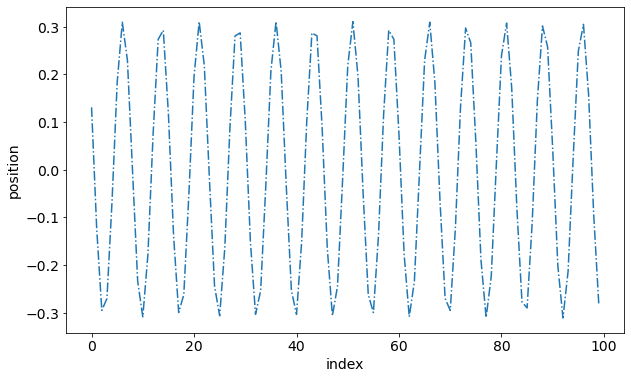

In [17]:
plt.plot(x,'-.')
plt.xlabel('index');
plt.ylabel('position');

In [18]:
#bonusq
N = 1000
x = -k*np.ones(N-1)
y = a*np.ones(N)
y[0] = a-k
y[N-1] = a-k
diagonals = [x, y, x]
A = sparse.diags(diagonals, [-1, 0, 1], shape=(N,N))

In [19]:
b = np.zeros(N)
b[0] = C

In [22]:
print(A)

  (1, 0)	-6.0
  (2, 1)	-6.0
  (3, 2)	-6.0
  (4, 3)	-6.0
  (5, 4)	-6.0
  (6, 5)	-6.0
  (7, 6)	-6.0
  (8, 7)	-6.0
  (9, 8)	-6.0
  (10, 9)	-6.0
  (11, 10)	-6.0
  (12, 11)	-6.0
  (13, 12)	-6.0
  (14, 13)	-6.0
  (15, 14)	-6.0
  (16, 15)	-6.0
  (17, 16)	-6.0
  (18, 17)	-6.0
  (19, 18)	-6.0
  (20, 19)	-6.0
  (21, 20)	-6.0
  (22, 21)	-6.0
  (23, 22)	-6.0
  (24, 23)	-6.0
  (25, 24)	-6.0
  :	:
  (974, 975)	-6.0
  (975, 976)	-6.0
  (976, 977)	-6.0
  (977, 978)	-6.0
  (978, 979)	-6.0
  (979, 980)	-6.0
  (980, 981)	-6.0
  (981, 982)	-6.0
  (982, 983)	-6.0
  (983, 984)	-6.0
  (984, 985)	-6.0
  (985, 986)	-6.0
  (986, 987)	-6.0
  (987, 988)	-6.0
  (988, 989)	-6.0
  (989, 990)	-6.0
  (990, 991)	-6.0
  (991, 992)	-6.0
  (992, 993)	-6.0
  (993, 994)	-6.0
  (994, 995)	-6.0
  (995, 996)	-6.0
  (996, 997)	-6.0
  (997, 998)	-6.0
  (998, 999)	-6.0


In [20]:
x = splinalg.spsolve(A, b)

/opt/conda/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',
